In [18]:
import matplotlib.pyplot as plt
import numpy as np
import time
from params import par
from tqdm import tqdm

pose_GT_dir = par.pose_dir  #'KITTI/pose_GT/'
predicted_result_dir = './result/'
gradient_color = False
adversarial_attack = True


Video 07
plotting...


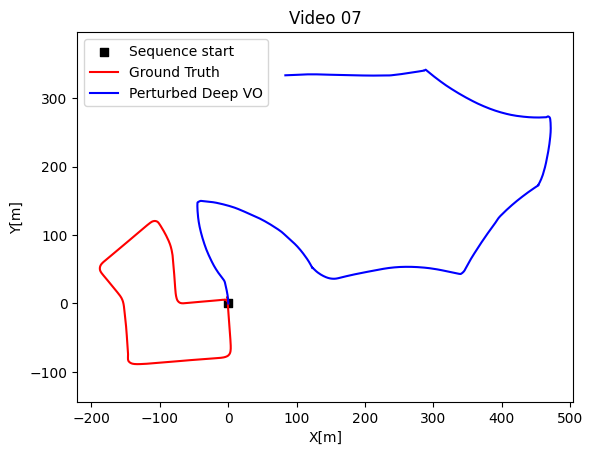

In [19]:
def plot_route(gt, out, c_gt='g', c_out='r'):
    x_idx = 3
    y_idx = 5
    x = [v for v in gt[:, x_idx]]
    y = [v for v in gt[:, y_idx]]
    plt.plot(x, y, color=c_gt, label='Ground Truth')
    #plt.scatter(x, y, color='b')

    x = [v for v in out[:, x_idx]]
    y = [v for v in out[:, y_idx]]
    plt.plot(x, y, color=c_out, label='DeepVO')
    #plt.scatter(x, y, color='b')
    plt.gca().set_aspect('equal', adjustable='datalim')

# Load in GT and predicted pose

video_list = ['07']

mse_rotate_hist = []
mse_translate_hist = []

for video in video_list:
    print('='*50)
    print('Video {}'.format(video))

    GT_pose_path = '{}{}.npy'.format(pose_GT_dir, video)
    gt = np.load(GT_pose_path)
    if adversarial_attack:
        save_name = '{}route_adversarial_{}.png'.format(predicted_result_dir, video)
        pose_result_path = '{}out_adversarial_{}.txt'.format(predicted_result_dir, video)
    else:
        save_name = '{}route_{}.png'.format(predicted_result_dir, video)
        pose_result_path = '{}out_{}.txt'.format(predicted_result_dir, video)
  
    with open(pose_result_path) as f_out:
        out = [l.split('\n')[0] for l in f_out.readlines()]
        for i, line in enumerate(out):
            out[i] = [float(v) for v in line.split(',')]
        out = np.array(out)
        mse_rotate = 100 * np.mean((out[:, :3] - gt[:, :3])**2)
        mse_translate = np.mean((out[:, 3:] - gt[:, 3:6])**2)

    
    if gradient_color:
        # plot gradient color
        step = 200
        plt.clf()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        for st in range(0, len(out), step):
            end = st + step
            g = max(0.2, st/len(out))
            c_gt = (0, g, 0)
            c_out = (1, g, 0)
            plot_route(gt[st:end], out[st:end], c_gt, c_out)
            if st == 0:
                plt.legend()
            plt.title('Video {}'.format(video))
    
        plt.savefig(save_name)
    else:
        # plot one color
        print('plotting...')
        plt.figure()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        plot_route(gt, out, 'r', 'b')
        plt.legend(['Sequence start','Ground Truth','Perturbed Deep VO'])
        plt.title('Video {}'.format(video))
        plt.xlabel('X[m]')
        plt.ylabel('Y[m]')
        plt.savefig('result/adversarial_attack_07.png')

### Selective perturbation (only perturbing the very first mini-batch for each batch)

Video 07
plotting...


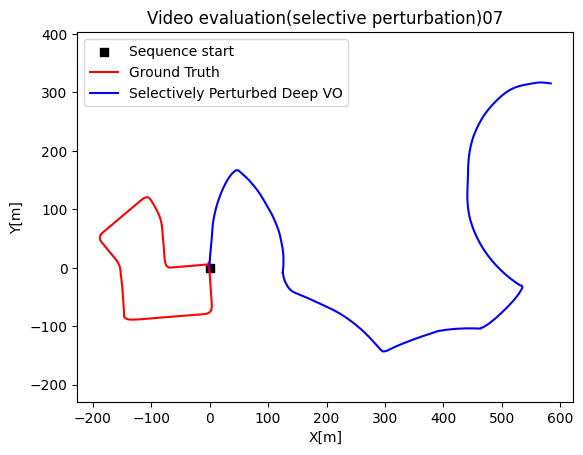

In [12]:
def plot_route(gt, out, c_gt='g', c_out='r'):
    x_idx = 3
    y_idx = 5
    x = [v for v in gt[:, x_idx]]
    y = [v for v in gt[:, y_idx]]
    plt.plot(x, y, color=c_gt, label='Ground Truth')
    #plt.scatter(x, y, color='b')

    x = [v for v in out[:, x_idx]]
    y = [v for v in out[:, y_idx]]
    plt.plot(x, y, color=c_out, label='DeepVO')
    #plt.scatter(x, y, color='b')
    plt.gca().set_aspect('equal', adjustable='datalim')

# Load in GT and predicted pose

video_list = ['07']

mse_rotate_hist = []
mse_translate_hist = []

for video in video_list:
    print('='*50)
    print('Video {}'.format(video))

    GT_pose_path = '{}{}.npy'.format(pose_GT_dir, video)
    gt = np.load(GT_pose_path)
    if adversarial_attack:
        save_name = '{}route_adversarial_{}.png'.format(predicted_result_dir, video)
        pose_result_path = '{}out_adversarial_{}.txt'.format(predicted_result_dir, video)
    else:
        save_name = '{}route_{}.png'.format(predicted_result_dir, video)
        pose_result_path = '{}out_{}.txt'.format(predicted_result_dir, video)
  
    with open(pose_result_path) as f_out:
        out = [l.split('\n')[0] for l in f_out.readlines()]
        for i, line in enumerate(out):
            out[i] = [float(v) for v in line.split(',')]
        out = np.array(out)
        mse_rotate = 100 * np.mean((out[:, :3] - gt[:, :3])**2)
        mse_translate = np.mean((out[:, 3:] - gt[:, 3:6])**2)

    
    if gradient_color:
        # plot gradient color
        step = 200
        plt.clf()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        for st in range(0, len(out), step):
            end = st + step
            g = max(0.2, st/len(out))
            c_gt = (0, g, 0)
            c_out = (1, g, 0)
            plot_route(gt[st:end], out[st:end], c_gt, c_out)
            if st == 0:
                plt.legend()
            plt.title('Video {}'.format(video))
    
        plt.savefig(save_name)
    else:
        # plot one color
        print('plotting...')
        plt.figure()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        plot_route(gt, out, 'r', 'b')
        plt.legend(['Sequence start','Ground Truth','Selectively Perturbed Deep VO'],loc='best')
        plt.title('Video evaluation(selective perturbation){}'.format(video))
        plt.xlabel('X[m]')
        plt.ylabel('Y[m]')
        plt.savefig('result/selective_adversarial_attack_07.png')

## Vanilla Deep VO

In [16]:
adversarial_attack = False

Video 07
plotting...


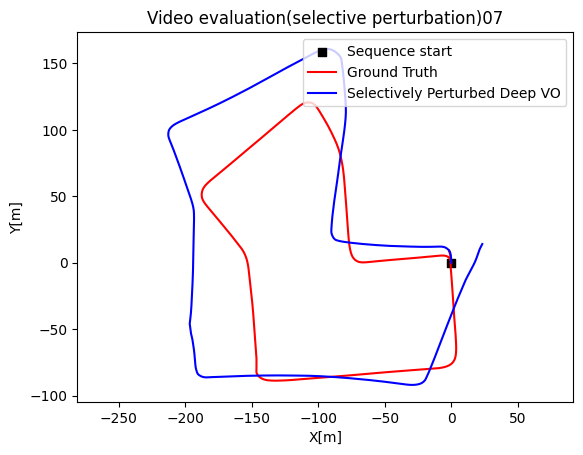

In [17]:
def plot_route(gt, out, c_gt='g', c_out='r'):
    x_idx = 3
    y_idx = 5
    x = [v for v in gt[:, x_idx]]
    y = [v for v in gt[:, y_idx]]
    plt.plot(x, y, color=c_gt, label='Ground Truth')
    #plt.scatter(x, y, color='b')

    x = [v for v in out[:, x_idx]]
    y = [v for v in out[:, y_idx]]
    plt.plot(x, y, color=c_out, label='DeepVO')
    #plt.scatter(x, y, color='b')
    plt.gca().set_aspect('equal', adjustable='datalim')

# Load in GT and predicted pose

video_list = ['07']

mse_rotate_hist = []
mse_translate_hist = []

for video in video_list:
    print('='*50)
    print('Video {}'.format(video))

    GT_pose_path = '{}{}.npy'.format(pose_GT_dir, video)
    gt = np.load(GT_pose_path)
    if adversarial_attack:
        save_name = '{}route_adversarial_{}.png'.format(predicted_result_dir, video)
        pose_result_path = '{}out_adversarial_{}.txt'.format(predicted_result_dir, video)
    else:
        save_name = '{}route_{}.png'.format(predicted_result_dir, video)
        pose_result_path = '{}out_{}.txt'.format(predicted_result_dir, video)
  
    with open(pose_result_path) as f_out:
        out = [l.split('\n')[0] for l in f_out.readlines()]
        for i, line in enumerate(out):
            out[i] = [float(v) for v in line.split(',')]
        out = np.array(out)
        mse_rotate = 100 * np.mean((out[:, :3] - gt[:, :3])**2)
        mse_translate = np.mean((out[:, 3:] - gt[:, 3:6])**2)

    
    if gradient_color:
        # plot gradient color
        step = 200
        plt.clf()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        for st in range(0, len(out), step):
            end = st + step
            g = max(0.2, st/len(out))
            c_gt = (0, g, 0)
            c_out = (1, g, 0)
            plot_route(gt[st:end], out[st:end], c_gt, c_out)
            if st == 0:
                plt.legend()
            plt.title('Video {}'.format(video))
    
        plt.savefig(save_name)
    else:
        # plot one color
        print('plotting...')
        plt.figure()
        plt.scatter([gt[0][3]], [gt[0][5]], label='sequence start', marker='s', color='k')
        plot_route(gt, out, 'r', 'b')
        plt.legend(['Sequence start','Ground Truth','Selectively Perturbed Deep VO'],loc='best')
        plt.title('Video evaluation(selective perturbation){}'.format(video))
        plt.xlabel('X[m]')
        plt.ylabel('Y[m]')
        plt.savefig('result/selective_adversarial_attack_07.png')